### Plot structure and dispersion curve of modes 0, 1, 2 DYE01

In [8]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.io as sio
import pandas as pd

%matplotlib inline

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [10]:
def get_Brink(file_fig, file_ratio):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
    k, f = file['wavenumber'][0][0], file['frequency'][0][0]

    # (u is cross-shore and v is alongshore in Brink. I'm flipping them back right here)
    p0, v0, u0, w0, r0 = file['p_profile'], file['u_profile'],file['v_profile'], file['w_profile'], file['r_profile']

    file_rfw = sio.loadmat(file_ratio)
    R = file_rfw['ratio_for_wave'][0][0]
    print('ratio for wave', R)
    print('k (rad/cm) ', k)
    print('lambda (km) ', (2*np.pi/(k*100E3)))
    print('omega (rad/s) ', f)
    print('c (m/s)', (f/(k*100)))
    scale=0.2
    w = w0 * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0 * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0 * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    return(u,v,w,r,p,z,k,f,xpl, xxx, zzz)

def plot_Brink(ax2,ax3,ax4,u,v,p,z,xpl,xxx,zzz,minp,maxp,nlev=15):
    landc='#8b7765'
    levels=np.linspace(minp,maxp,nlev)
    p3 = ax4.contourf(xpl, z, p, levels=levels, cmap=cmo.cm.delta, vmin=minp, 
                      vmax=maxp, zorder=1)
    ax4.contour(xpl, z, p, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax4.contour(xpl, z, p, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax4.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax4.set_title('p')

    levels=np.linspace(np.nanmin(v),np.nanmax(v),nlev)
    p4 = ax2.contourf(xpl, z, v, levels=levels, cmap=cmo.cm.balance, vmin=-np.nanmax(v),
                      vmax=np.nanmax(v), zorder=1)
    ax2.contour(xpl, z, v, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax2.contour(xpl, z, v, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax2.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax2.set_title('v, cross-shelf')

    levels=np.linspace(np.nanmin(u),np.nanmax(u),nlev)
    p4 = ax3.contourf(xpl, z, u, levels=levels, cmap=cmo.cm.balance, vmin=np.nanmin(u),
                      vmax=-np.nanmin(u), zorder=1)
    ax3.contour(xpl, z, u, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax3.contour(xpl, z, u, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax3.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax3.set_title('u, along-shelf')

def plot_surface(ax0,ax1,v,p,xpl):
    ax0.plot(xpl,p,'-', color='navy', label='surface pressure')
    ax1.plot(xpl,v,'-', color='navy', label='surface cross-shore vel.')
    ax0.axhline(0, color='0.5')
    ax1.axhline(0, color='0.5')
    ax0.set_ylabel('P')
    ax1.set_ylabel('v')
    ax0.legend()
    ax1.legend()
    ax1.set_xlabel('Cross-shelf distance / km')

### Dispersion curves

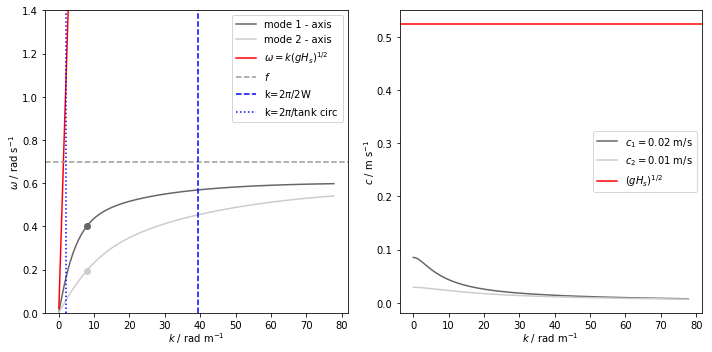

In [30]:
g = 9.81  # gravitational accel. m/s^2
Hs = 0.028  # m shelf break depth
f = 0.7  # inertial frequency
W = 0.08
diam = 1 # m, tank diameter

data_mode1 = pd.read_csv('../dispc_LabAxis_DYE01_mode1.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode2 = pd.read_csv('../dispc_LabAxis_DYE01_mode2.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])

omega1 = data_mode1['freq']
omega2 = data_mode2['freq']

k1 = data_mode1['wavenum']*100
k2 = data_mode2['wavenum']*100

fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.plot(k1, omega1, '-', color='0.4', label='mode 1 - axis')
ax0.plot(k1[10], omega1[10], 'o', color='0.4')
ax0.plot(k2, omega2, '-', color='0.8', label='mode 2 - axis')
ax0.plot(k2[10], omega2[10], 'o', color='0.8')

ax0.plot(k1, (k1*(g*Hs)**0.5), 'r-', label=r'$\omega=k(gH_s)^{1/2}$')
ax0.axhline(f, linestyle='--', color='0.6', label='$f$')
ax0.axvline((2*np.pi)/(2*W), linestyle='--', color='blue',label=r'k=2$\pi$/2W')
ax0.axvline((2*np.pi)/(np.pi*diam), linestyle=':', color='blue',label=r'k=2$\pi$/tank circ')

ax1.plot(k1, omega1/k1, '-', color='0.4',
         label='$c_1=$%1.2f m/s' % (np.mean(omega1/k1)))
ax1.plot(k2, omega2/k2, '-', color='0.8',
         label='$c_2=$%1.2f m/s' % (np.mean(omega2/k2)))
ax1.axhline((g*Hs)**0.5, linestyle='-', color='red', label='$(gH_s)^{1/2}$')

ax0.set_xlabel(r'$k$ / rad m$^{-1}$', labelpad=0.1)
ax1.set_xlabel(r'$k$ / rad m$^{-1}$', labelpad=0.1)
ax0.set_ylabel(r'$\omega$ / rad s$^{-1}$', labelpad=0.1)
ax1.set_ylabel(r'$c$ / m s$^{-1}$', labelpad=-0.1)
ax0.set_ylim(0, f*2)
ax0.legend()
ax1.legend()
plt.tight_layout()
#plt.savefig('../figures/disp_curve_AST.png', format='png', bbox_inches='tight')

#### Long waves axis depth profile - modes 1 and 2

ratio for wave 5.560403525549715
k (rad/cm)  0.0789
lambda (km)  0.0007963479476780211
omega (rad/s)  0.4
c (m/s) 0.05069708491761724


Text(0.5,0,'Cross-shelf distance / km')

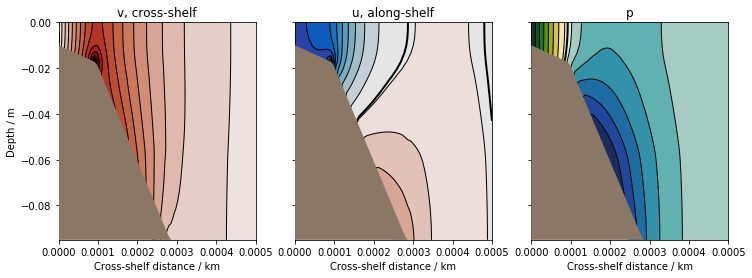

In [23]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../figures_LabAxis_DYE01_mode1.mat' ,
                                        '../ratio_for_wave_LabAxis_DYE01_mode1.mat')
minp = np.nanmin(p)
maxp = np.nanmax(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

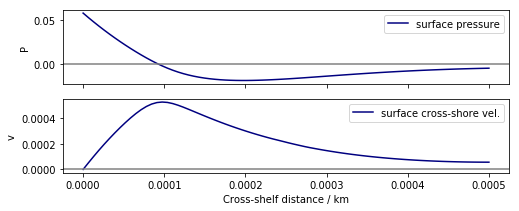

In [24]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 2.1868175275684947
k (rad/cm)  0.0789
lambda (km)  0.0007963479476780211
omega (rad/s)  0.1946
c (m/s) 0.024664131812420786


Text(0.5,0,'Cross-shelf distance / km')

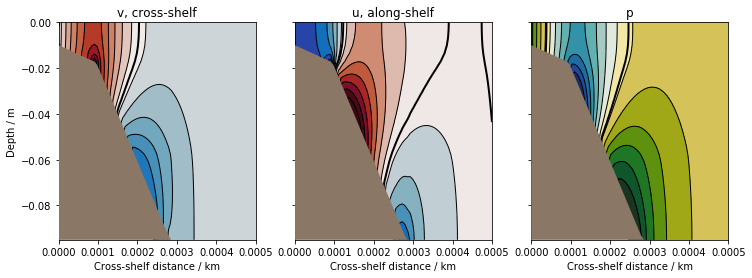

In [25]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../figures_LabAxis_DYE01_mode2.mat' ,
                                        '../ratio_for_wave_LabAxis_DYE01_mode2.mat')
minp = np.nanmin(p)
maxp = np.nanmax(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

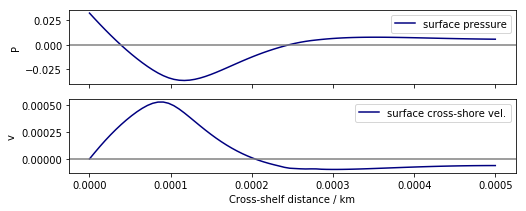

In [26]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

In [31]:
print(k2[50], omega2[50])

39.309178 0.45353911
